In [3]:
import pandas as pd
import geopandas as gpd
import os
import sys
import glob

# get current directory (where the notebook is stored)
cwd = os.getcwd()
# get back to the path of the root directory
path_module = cwd.split('ML_paper')[0]+'ML_paper'
# add path to enable the import of the modules
sys.path.append(path_module)

from Utils.preproc_utils import import_csv_w_wkt_to_gdf


# paths
path_windows = 'C:\\Users\\miln\\tubCloud\\ML_paper'
path_cluster = '/home/nikolami/ML_paper'
path_hdd = 'E:\\ML_paper'

path_to_data = path_hdd

In [8]:
dir = os.path.join(path_to_data,'Data','2-data_preprocessed','France','Rhône')

In [9]:
arrondissements = ['Lyon, 1er arrondissement',
 'Lyon, 2e arrondissement',
 'Lyon, 3e arrondissement',
 'Lyon, 4e arrondissement',
 'Lyon, 5e arrondissement',
 'Lyon, 6e arrondissement',
 'Lyon, 7e arrondissement',
 'Lyon, 8e arrondissement',
 'Lyon, 9e arrondissement']

## buildings

In [22]:
Lyon = gpd.GeoDataFrame()

for arrondissement in arrondissements:
    
    print(arrondissement)
    
    path = os.path.join(dir,arrondissement,arrondissement+'_buildings.csv')
    
    part_buildings = import_csv_w_wkt_to_gdf(path, 2154)
    
    Lyon = Lyon.append(part_buildings)

Lyon, 1er arrondissement
Lyon, 2e arrondissement
Lyon, 3e arrondissement
Lyon, 4e arrondissement
Lyon, 5e arrondissement
Lyon, 6e arrondissement
Lyon, 7e arrondissement
Lyon, 8e arrondissement
Lyon, 9e arrondissement


In [16]:
os.mkdir(os.path.join(dir,'Lyon'))

In [23]:
for _,row in Lyon.iterrows():

    row['geometry'] = row['geometry'].wkt

Lyon = pd.DataFrame(Lyon).reset_index(drop=True)

Lyon.to_csv(os.path.join(dir,'Lyon','Lyon_buildings.csv'),
                      index=False)

## boundaries

In [24]:
Lyon = gpd.GeoDataFrame()

for arrondissement in arrondissements:
    
    print(arrondissement)
    
    path = os.path.join(dir,arrondissement,arrondissement+'_boundaries.csv')
    
    part_boundaries = import_csv_w_wkt_to_gdf(path, 2154)
    
    part_boundaries = part_boundaries.iloc[0]
    
    Lyon = Lyon.append(part_boundaries)

Lyon, 1er arrondissement
Lyon, 2e arrondissement
Lyon, 3e arrondissement
Lyon, 4e arrondissement
Lyon, 5e arrondissement
Lyon, 6e arrondissement
Lyon, 7e arrondissement
Lyon, 8e arrondissement
Lyon, 9e arrondissement


In [25]:
Lyon

boundary_name                      city  \
0  boundary_gdam  Lyon, 1er arrondissement   
0  boundary_gdam   Lyon, 2e arrondissement   
0  boundary_gdam   Lyon, 3e arrondissement   
0  boundary_gdam   Lyon, 4e arrondissement   
0  boundary_gdam   Lyon, 5e arrondissement   
0  boundary_gdam   Lyon, 6e arrondissement   
0  boundary_gdam   Lyon, 7e arrondissement   
0  boundary_gdam   Lyon, 8e arrondissement   
0  boundary_gdam   Lyon, 9e arrondissement   

                                            geometry  
0  POLYGON ((842975.982 6520184.110, 842259.994 6...  
0  POLYGON ((841352.997 6518198.157, 842259.994 6...  
0  POLYGON ((844586.008 6518364.999, 842907.993 6...  
0  POLYGON ((840873.989 6520693.971, 840571.981 6...  
0  POLYGON ((841352.997 6518198.157, 840981.989 6...  
0  POLYGON ((844527.006 6522462.895, 844415.002 6...  
0  POLYGON ((841809.998 6514417.930, 841614.985 6...  
0  POLYGON ((843873.011 6514960.000, 843831.009 6...  
0  POLYGON ((840873.989 6520693.971, 841415.007 6...

In [36]:
for _,row in Lyon.iterrows():

    row['geometry'] = row['geometry'].wkt

Lyon = pd.DataFrame(Lyon).reset_index(drop=True)

Lyon.to_csv(os.path.join(dir,'Lyon','Lyon_boundaries_by_arrondissement.csv'),
                      index=False)

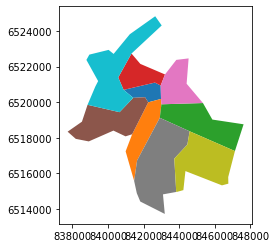

In [27]:
Lyon.plot(column='city')

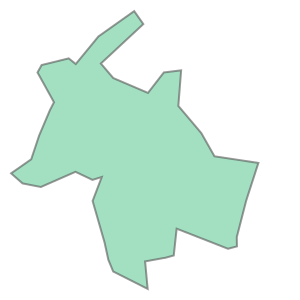

In [29]:
new_geom = Lyon.geometry.unary_union
new_geom

In [33]:
city_gdam = gpd.GeoDataFrame()

city_name = 'Lyon'

boundary_gdam = gpd.GeoDataFrame({'city' : city_name,
                                   'geometry' : new_geom.wkt,
                                   'boundary_name' : 'boundary_gdam'}, 
                                 index = [0],
                                 crs = 2154)

boundary_gdam_500m_buffer = gpd.GeoDataFrame({'city' : city_name,
                                   'geometry' : new_geom.buffer(500).wkt,
                                   'boundary_name' : 'boundary_gdam_500m_buffer'}, 
                                 index = [0],
                                 crs = 2154)

boundary_gdam_2k_buffer = gpd.GeoDataFrame({'city' : city_name,
                                 'geometry' : new_geom.buffer(2000).wkt,
                                 'boundary_name' : 'boundary_gdam_2k_buffer'}, 
                             index = [0],
                             crs = 2154)

city_gdam = city_gdam.append(boundary_gdam)
city_gdam = city_gdam.append(boundary_gdam_500m_buffer)
city_gdam = city_gdam.append(boundary_gdam_2k_buffer)

In [34]:
city_gdam

city                                           geometry  \
0  Lyon  POLYGON ((841809.9981638868 6514417.930416628,...   
0  Lyon  POLYGON ((840228.2157216682 6523399.589190555,...   
0  Lyon  POLYGON ((837204.1715285141 6521100.53567117, ...   

               boundary_name  
0              boundary_gdam  
0  boundary_gdam_500m_buffer  
0    boundary_gdam_2k_buffer

In [35]:
city_gdam = pd.DataFrame(city_gdam).reset_index(drop=True)

city_gdam.to_csv(os.path.join(dir,'Lyon','Lyon_boundaries.csv'),
                      index=False)